In [6]:
from environment import Environment
import matplotlib.pyplot as plt
import numpy as np

In [86]:
deg2rad = np.pi/180
steering_step = 10*deg2rad
num_of_episodes = 1
env = Environment()
reward_list, episode_len_list = [], []
# simple implementation of a PI controller
# error: distance away from the center line
# PI parameters
Kp = 0.001;
Ki = 0.00000000001;
Kd = 0.01

In [88]:
for i in range(num_of_episodes):
    obs, info = env.reset()
    done = False
    ep_len, rew = 0, 0
    a = [1, 0, 0]
    sum_error = 0
    prev_error = 0
    while(done != True and ep_len < 2000):
        ep_len += 1
        obs, reward, done, info = env.step(a)
        # PI controller 
        error = list(info.values())[4]
        diff_error = error - prev_error
        sum_error = sum_error + error
        out = Kp*error + Ki*sum_error + Kd*diff_error
        prev_error = error
        a = [1, 0, out]
        rew  += reward
    reward_list.append(rew), episode_len_list.append(ep_len)

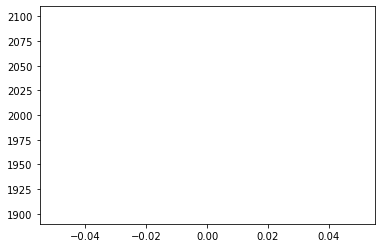

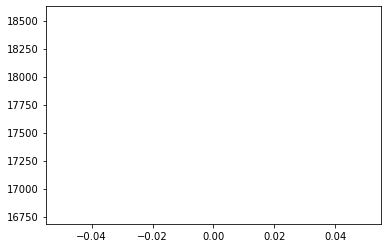

In [79]:
plt.plot(episode_len_list)
plt.show()
plt.plot(reward_list)
plt.show()

In [89]:
env.close()